# Word Embedding

Når vi taler om digital humaniora inden for litteratur, så handler det ofte om at måle koncentrationen af et eller flere ord eller begreber i en eller flere tekster. For at kunne foretage målinger og beregniner, har man behov for anvende tal i stedet for ord. 

Word embeddings er et begreb, der knytter sig til dette på den måde, at word embeddings er et parapylbegreb, der knytter sig til forskellige andre begreber og algoritmer, der har det tilfælles, at de inddrages i digital tekstanalyse, og at de forudsætter at have ord og tekst repræsenteret som tal.

Denne notebook handler om at få en forståelse for, hvordan og hvorfor man inden for digital tekstanalyse repræsenterer ord med tal for at kunne foretage målinger på teksterne.

## Indlæs data

Lad os forestille os, at vi har fem tekster. Det kunne være fem meget lange tekster, men i denne sammenhæng benytter vi fem korte tekster, hvor nogle af de samme ord optræder flere gange. Teksten stammer fra sangen Tears of a Clown, der er skrevet at bandet The Casket Girls, men dette er egentlig fuldstændigt lige meget i denne sammenhæng.  

In [1]:
text1 = "Making money, making money"
text2 = "Making money, making money is for the birds"
text3 = "If it was not for making money"
text4 = "We would be making love not war"
text5 = "Honey, fuck what you heard"

Teksterne vil vi gerne fortage forskellige beregninger på. Beregninger kunne f.eks. handle om, at vi ville undersøge, hvor mange gange en tekst nævner et bestemt ord, men det kunner også være at vi ville undersøge, hvor forskellige teksterne var fra hinanden.

For at kunne foretage, der slags beregninger er vi nødt til at omdanne teksterne til tal, og før end vi kan gøre dette skal teksterne klargøres.     

## Klargør tekstdata

Klargøringen begynder med at vi samler vores korpus i en liste.

In [2]:
text_list = [text1, text2, text3, text4, text5]

In [3]:
text_list 

['Making money, making money',
 'Making money, making money is for the birds',
 'If it was not for making money',
 'We would be making love not war',
 'Honey, fuck what you heard']

Klargøringen forsætter ved at vi sikre at alle ord er skrevet med små bogstaver.

In [4]:
lower_text_list = [i.lower() for i in text_list]

In [5]:
lower_text_list

['making money, making money',
 'making money, making money is for the birds',
 'if it was not for making money',
 'we would be making love not war',
 'honey, fuck what you heard']

Vi vil også gerne fjerne alle andre tegn end bogstaver, og de rensede tekster vil jeg også have splittet op i ordlister. Til dette benytter jeg regex biblioteks funktion, der hedder findall og et regulært udtryk, der matcher alt andet mellem begyndelsen og slutningen på et ord end mellemrum, tabulator eller linjeskift.

In [6]:
import re
clean_text_list = [re.findall(r'\b(\S+)\b', i) for i in lower_text_list]

In [7]:
clean_text_list

[['making', 'money', 'making', 'money'],
 ['making', 'money', 'making', 'money', 'is', 'for', 'the', 'birds'],
 ['if', 'it', 'was', 'not', 'for', 'making', 'money'],
 ['we', 'would', 'be', 'making', 'love', 'not', 'war'],
 ['honey', 'fuck', 'what', 'you', 'heard']]

Jeg har nu en liste, der består af fem ordlister. Hvert element i disse ordlisterne er ordene fra de rensede tekster.

## Fra tekst til tal

Næste del af øvelsen handler om at omskabe teksterne, så de kan blive repræsenteret som en række af tal. I "computer-sprog" kaldes dette også for en vektor. _(In "A Dictionary of Computer Science", edited by Butterfield, Andrew, Gerard Ekembe Ngondi, and Anne Kerr. : Oxford University Press, 2016. https://www-oxfordreference-com.ep.fjernadgang.kb.dk/view/10.1093/acref/9780199688975.001.0001/acref-9780199688975-e-5671)._

Dette er som beskrevet før med det formål at kunne foretage målinger og beregninger på teksternes indhold. 

For at kunne komme i mål med at bygge en vektor, der er en repræsentation af teksten, har vi brug for at bygge en _dictionary,_ hvis elementer består af unikke ord fra vores korpus. Med unikke ord mener jeg, at der kun vil være et af hvert af de ord, der findes i vores tekster.

Ovenfor endte vi med variablen _clean_text_list,_ der er en liste, der består af fem lister. 

Denne liste af lister vil jeg gerne bruge til at bygge omtalte _dictionary,_ men for at kunne gøre dette skal listen flades ud til én liste. Dette skriver jeg på følgende måde.

In [8]:
word_list = [x for y in clean_text_list for x in y]

In [9]:
print(word_list)

['making', 'money', 'making', 'money', 'making', 'money', 'making', 'money', 'is', 'for', 'the', 'birds', 'if', 'it', 'was', 'not', 'for', 'making', 'money', 'we', 'would', 'be', 'making', 'love', 'not', 'war', 'honey', 'fuck', 'what', 'you', 'heard']


Ordlisten er fyldt af dubleanter, som jeg har brug for at fjerne, fordi jeg har brug for en liste af unikke ord.

Dubleanterne filterer jeg væk fra ordlisten ved at omdanne den til et _set,_ fordi et _set_ tillader ikke to elementer med samme værdi. Et sådan _set_ bliver også kaldet for en 'Bag of Words' eller 'bow'.

In [10]:
word_set = set(word_list)

In [11]:
print(word_set)

{'be', 'is', 'love', 'it', 'birds', 'would', 'not', 'what', 'money', 'was', 'if', 'war', 'for', 'fuck', 'heard', 'honey', 'we', 'making', 'you', 'the'}


Nu har jeg materiale til at bygge en _dictionary_ med korpussets unikke ord. 

## Skriv en funktion

Jeg skriver nu en funktion, som jeg kalder _vectorizer,_ fordi funktionen indeholder en kode, der kan benyttes til at repræsentere teksterne som tal. 

I koden bygger jeg en _dictionary,_ der består af ordene fra _settet_ og hvert ord bliver i samme _dictionary_ tildelt værdien 0.

For hvert ord i ordlisterne lægger jeg 1 til ordets værdi, hvis ordet optræder i listen med rensede tekster. Hvis ordet ikke optræder i listen forbliver deres værdi lig med 0.

In [12]:
def vectorizer(L):
    unique_words = dict.fromkeys(word_set, 0)
    for word in L:
        # Tjek om ordet er der
        if word in unique_words:
            # Forøg med 1
            unique_words[word] = unique_words[word] + 1
        else:
            # Tilføj ordet med 1
            unique_words[word] = 1

    # retuner værdierne
    return list(unique_words.values())

Funktionen implementerer jeg i en _list comprehension,_ og resultatet bliver en liste, som jeg gemmer i variablen _vectorized_text_list._

In [13]:
vectorized_text_list = [vectorizer(i) for i in clean_text_list]

In [14]:
vectorized_text_list

[[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]]

Hver tekst er nu repræsenteret som en række tal, hvilket giver mulighed for at foretage beregninger på teksterne. 

## Anvendelsesmuligheder
### Frekvens analyse / ordoptælling

Vi kan f.eks. bruge vores set (bow) sammen med vores vektorer til visualisere, hvor mange gange hvert ord er nævnt i hver tekst.

Jeg bruger pandas til at gemme vores 'bow' i sammen med vektorerne.

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(vectorized_text_list, 
                  index=['text1','text2','text3', 'text4', 'text5'], 
                  columns=word_set)

In [18]:
df

,if,would,the,birds,you,fuck,we,war,making,is,not,money,love,what,honey,it,be,for,was,heard
text1,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0
text2,0,0,1,1,0,0,0,0,2,1,0,2,0,0,0,0,0,1,0,0
text3,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0
text4,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0
text5,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1


I dataframen ovenfor er ordene i 'bow' blevet kolonnenavne, teksterne udgør indekset og vektorerne er lig med værdierne.

Med 'bow'-ordene som kolonnenavne kan jeg bruge pandas til at lave et _subset_ af dataframen ved at udvælge de kolonnernavne, hvis værdier jeg ønsker at plotte i et søljediagram.

<AxesSubplot:>

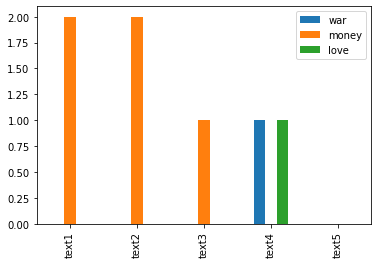

In [19]:
df[['war', 'money', 'love']].plot.bar()

### Variation

Vi kan også ud fra vektorerne beregne et tal for, hvor meget teksternes vektorer varierer fra hinanden.

Beregningen foregår i en funktion med en kode, hvor den absolutte værdi af vec1[i] minus vec2[i] bliver lagt sammen og divideret med vektorens længden.

In [20]:
def variation(vec1, vec2):
    l = len(vec1)
    v = 0
    for i in range(l):
        v += abs(vec1[i] - vec2[i])
    return v/l

In [21]:
variation_vec1_vec2 = variation(vectorized_text_list[0], vectorized_text_list[1])

Variationen mellem vektor 1 og vektor 2 er: 4 / 20 = 0.2

In [22]:
variation_vec1_vec2

0.2

In [23]:
variation_vec1_vec3 = variation(vectorized_text_list[0], vectorized_text_list[2])

In [24]:
variation_vec1_vec3

0.35

Variationen mellem vektor 1 og vektor 3 er lig med 0.35 og set ud fra dette resultat er variationen mellem tekst 1 og tekst 2 mindre end variationen mellem tekst 1 og tekst 3.

Giver det mening? Kig på teksterne igen eller lyt til sangen _Tears of a Clown_ af The Casket Girls og døm selv (https://www.youtube.com/watch?v=C0aoFiwiXbk).


- text1 = "Making money, making money"
- text2 = "Making money, making money is for the birds"
- text3 = "If it was not for making money"
- text4 = "We would be making love not war"
- text5 = "Honey, fuck what you heard"

Notebooken slutter her med et par beregninger af variationerne mellem de forskellige vektorer.

In [25]:
variation_vec2_vec3 = variation(vectorized_text_list[1], vectorized_text_list[2])

In [26]:
variation_vec2_vec3

0.45

In [27]:
variation_vec4_vec5 = variation(vectorized_text_list[3], vectorized_text_list[4])

In [28]:
variation_vec4_vec5

0.6

# Litteratur

Usman Malik, Implementing Word2Vec with Gensim Library in Python on Stack Abuse  https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/

A Dictionary of Computer Science", edited by Butterfield, Andrew, Gerard Ekembe Ngondi, and Anne Kerr. : Oxford University Press, 2016. https://www-oxfordreference-com.ep.fjernadgang.kb.dk/view/10.1093/acref/9780199688975.001.0001/acref-9780199688975-e-5671

Refsnes Data, Python Sets on w3schools https://www.w3schools.com/python/python_sets.asp

Refsnes Data, Python Dictionaries on w3schools https://www.w3schools.com/python/python_dictionaries.asp

The Casket Girls, Tears of a Clown, Graveface Records, 2016 https://www.youtube.com/watch?v=C0aoFiwiXbk.